In [31]:
import numpy as np 
import matplotlib.pyplot as plt

# Generate data
np.random.seed(22)

means = [[2, 2], [4, 6]]
cov = [[1, 0], [0, 1]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

# Solve Problem
from cvxopt import matrix, solvers
# build P, q
Xbar = np.concatenate((X0, X1), axis = 0) * y.reshape(-1,1)
P = matrix(Xbar.dot(Xbar.T))
q = matrix(-np.ones((2*N, 1)))
# build A, b, G, h 
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) 
b = matrix(np.zeros((1, 1)))
# solve
solvers.options['show_progress'] = False
solution = solvers.qp(P, q, G, h, A, b)

alphas = np.array(solution['x'])

# Calculate w and b
# computing w
w = Xbar.T.dot(alphas)

# selecting the set of indices S corresponding to non zero parameters
S_bool = (alphas > 1e-8).flatten()
S = np.where(alphas > 1e-8)

# computing b
b_array = y.T[S_bool] - np.dot(X.T[S_bool], w)
b = b_array[0]

#Display results
print('Alphas = ', alphas[alphas > 1e-8])
print('w = ', w)
print('b = ', b)

Alphas =  [4.16662779e-01 4.22591258e-08 4.16662736e-01]
w =  [[-0.48892782]
 [-0.77089245]]
b =  [4.70598761]


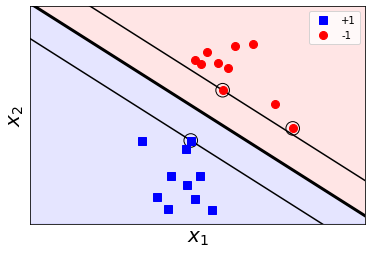

In [37]:
# Draw
# plot points
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')

y4 = -0.5 * x1 + 20
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='blue', alpha='0.1')
plt.fill_between(x1, y1, y4, color = 'red', alpha = '0.1')

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1, label = '+1')
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1, label = '-1')

plt.axis('equal')
plt.ylim(0, 8)
plt.xlim(0, 6)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

# add circles around support vectors 
for m in S[0]:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.25, color='k', fill = False)
    ax.add_artist(circle)

plt.legend()
plt.show()